In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('/drBigBoy/darkRadio/drlib/')
import drlib as dr

def dBm2Watts(dBmArr):
    #input: power specrum array (in dBm)
    #returns: power spectrum array (in Watts)
    return 10**(dBmArr/10) / 1000



In [36]:
#import data

#MHZ
freqData = np.load('./run1_freqData_avgAll11776Spectra_gitignore.npy')
#dBm. throw out DC bin
roachNoisedBm = np.loadtxt('./TermExample_2E24FFT_50Term_1e3Averages_NoGain_10-18-22_gitignore.npy')[1:]
#FFT units. throw out DC bin
antData = np.load('./run1_antData_avgAll11776Spectra_gitignore.npy')[1:]
termData = np.load('./run1_termData_avgAll11776Spectra_gitignore.npy')[1:]

#convert spectra to dBm
antDatadBm = dr.fft2dBm(antData)
termDatadBm = dr.fft2dBm(termData)

roachNoiseWatts = dBm2Watts(roachNoisedBm)
antDataWatts = dBm2Watts(antDatadBm)
termDataWatts = dBm2Watts(termDatadBm)


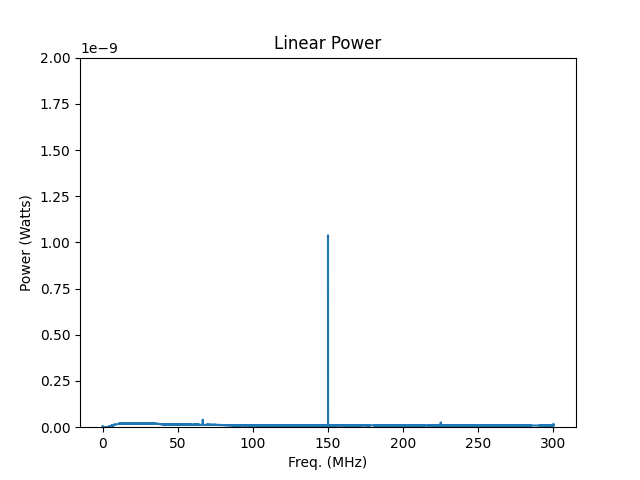

"\nplt.figure()\nplt.title('dB_(arb) Power')\nplt.plot(freqData, roachNoisedBm + 14, label = 'ROACH Noise+14dB')\n#plt.plot(freqData,antDatadBm, label = 'Antenna+56dB Gain')\nplt.plot(freqData,termDatadBm, label = 'Terminator+56dB Gain')\nplt.ylabel('Power + constatant (dB)')\nplt.xlabel('Freq. (MHz)')\n#plt.legend()\n#plt.show()\n"

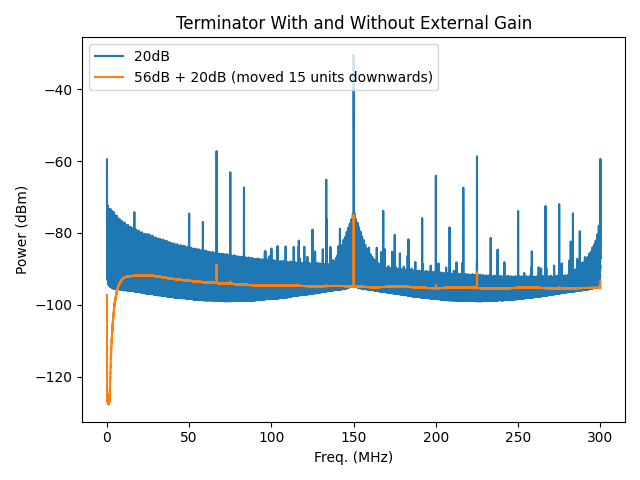

In [40]:
%matplotlib widget
plt.close('all')

plt.figure()
plt.title('Linear Power')
#plt.plot(freqData, roachNoiseWatts, label = 'ROACH Noise')
#plt.plot(freqData,antDataWatts, label = 'Antenna*7e5 Gain')
plt.plot(freqData,termDataWatts, label = 'Terminator*7e5 Gain')
plt.ylim(0, 2e-9)
plt.ylabel('Power (Watts)')
plt.xlabel('Freq. (MHz)')
plt.show()
plt.legend(loc = 'upper left');


plt.figure()
plt.title('Terminator With and Without External Gain')
plt.plot(freqData, roachNoisedBm, label = '20dB')
#plt.plot(freqData,antDatadBm, label = 'Antenna+56dB Gain')
plt.plot(freqData,termDatadBm -15, label = '56dB + 20dB (moved 15 units downwards)')
plt.ylabel('Power (dBm)')
plt.xlabel('Freq. (MHz)')
plt.legend(loc = 'upper left')
plt.tight_layout();
'''
plt.figure()
plt.title('dB_(arb) Power')
plt.plot(freqData, roachNoisedBm + 14, label = 'ROACH Noise+14dB')
#plt.plot(freqData,antDatadBm, label = 'Antenna+56dB Gain')
plt.plot(freqData,termDatadBm, label = 'Terminator+56dB Gain')
plt.ylabel('Power + constatant (dB)')
plt.xlabel('Freq. (MHz)')
#plt.legend()
#plt.show()
'''

example of bool arr [False False False ... False False False]
total number of signals > thresh =  494
number of signals > thresh, above 50MHz =  458
number of signals > thresh =  140


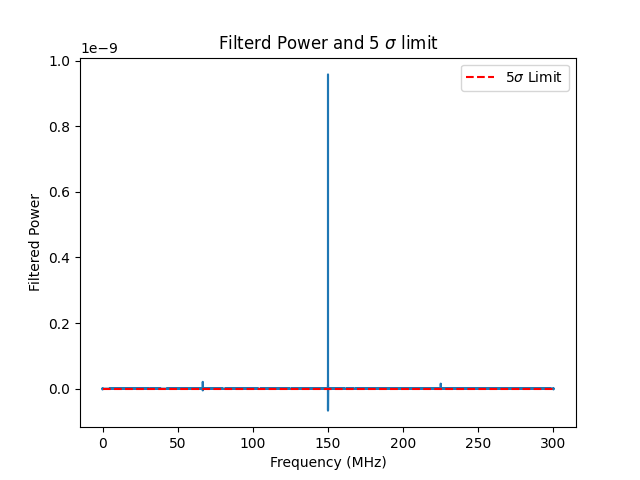

In [17]:
from scipy import signal
%matplotlib notebook

# Sampling rate such that the total amount of data is 1s
fs = len(antData)

# Cutoff in number of bins
fc = 30

# Normalize the frequency in term of Nyquist
fcNorm = 2./(fc)

# Create a 6th-order Butterworth filter - returns numerator (b) and denominator (a) polynomials of the IIR filter
b, a = signal.butter(6, fcNorm, 'highpass', analog = False)


# Apply the Butterworth filter to the acquired data that has been corrected for the 
# noise power of the amplifiers and the gain of the amplifiers
filteredData = signal.filtfilt(b, a, termDataWatts[:])

filteredDataMean = filteredData.mean()
filteredDataStd = filteredData[1000000:1010000].std()
filteredDataThresh = filteredDataMean + 5 * filteredDataStd


startFreq = 50 #Mhz
startFreqIdx = int(startFreq/300 * len(freqData))



stopFreq = 149.99 #Mhz
stopFreqIdx = int(stopFreq/300 * len(freqData))

#boolian arr
print('example of bool arr', filteredData > filteredDataThresh)
#vectorized function (sum)
print('total number of signals > thresh = ', (filteredData > filteredDataThresh).sum())
#only look at freq > 50Mhz
print('number of signals > thresh, above 50MHz = ',(filteredData[startFreqIdx:] > filteredDataThresh).sum())
#only look at freq in some range
print('number of signals > thresh = ',(filteredData[startFreqIdx:stopFreqIdx] > filteredDataThresh).sum())

plt.close('all')
plt.figure()
plt.title('Filterd Power and 5 $\sigma$ limit')
plt.plot((freqData), (filteredData))
plt.plot((0, 300), (filteredDataThresh, filteredDataThresh), 'r--', label = '5$\sigma$ Limit')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Filtered Power')
plt.legend()
plt.show()

In [5]:
filteredDataMean = filteredData.mean()
filteredDataStd = filteredData.std()
filteredDataThresh = filteredDataMean + 5 * filteredDataStd